<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLPByClass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sklearn pandas

import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2952 sha256=238d140c85115c6357d24e99e77f78d6097edcfc3ebd7751b76ce3771a39817f
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn
Mounted at /content/drive


In [3]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set_2.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set_2.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB_2.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB_2.csv")

In [4]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=2, average='macro', threshold=0.5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/new_df/best_model_by_class2.hdf5"

In [6]:
model = Sequential()

model.add(Dense(100, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add(Dense(80, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(60, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(40, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(20, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1,save_best_only=True, mode='auto', period=1)

Streaming output truncated to the last 5000 lines.
34/36 [===========================>..] - ETA: 0s - loss: 0.1424 - accuracy: 0.9351
Epoch 3752: loss did not improve from 0.12482
36/36 [==============================] - 1s 15ms/step - loss: 0.1430 - accuracy: 0.9341 - val_loss: 0.1461 - val_accuracy: 0.9625
Epoch 3753/5000
35/36 [============================>.] - ETA: 0s - loss: 0.1368 - accuracy: 0.9356
Epoch 3753: loss did not improve from 0.12482
36/36 [==============================] - 0s 13ms/step - loss: 0.1363 - accuracy: 0.9357 - val_loss: 0.1721 - val_accuracy: 0.9473
Epoch 3754/5000
32/36 [=========================>....] - ETA: 0s - loss: 0.1338 - accuracy: 0.9368
Epoch 3754: loss did not improve from 0.12482
36/36 [==============================] - 1s 16ms/step - loss: 0.1334 - accuracy: 0.9376 - val_loss: 0.1384 - val_accuracy: 0.9697
Epoch 3755/5000
35/36 [============================>.] - ETA: 0s - loss: 0.1302 - accuracy: 0.9400
Epoch 3755: loss did not improve from 0.1

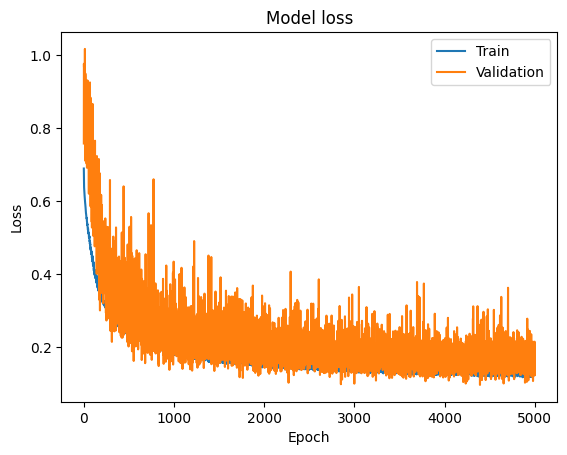



*********************************************




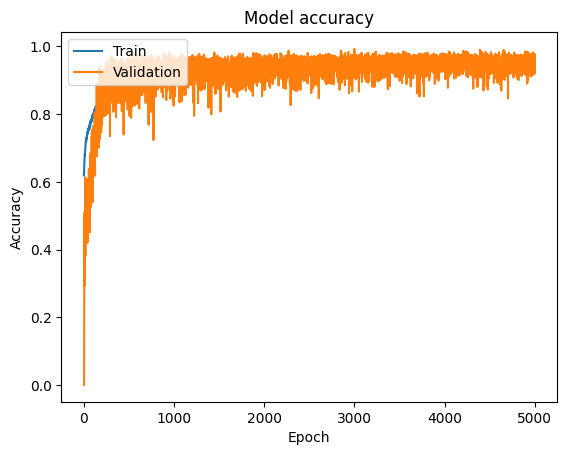



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 2ms/step - loss: 2.8615 - accuracy: 0.7406
[2.861520528793335, 0.7405987977981567]
131/131 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

   class 0_1       0.87      0.80      0.83      3369
     class 2       0.37      0.49      0.42       806

    accuracy                           0.74      4175
   macro avg       0.62      0.65      0.63      4175
weighted avg       0.77      0.74      0.75      4175



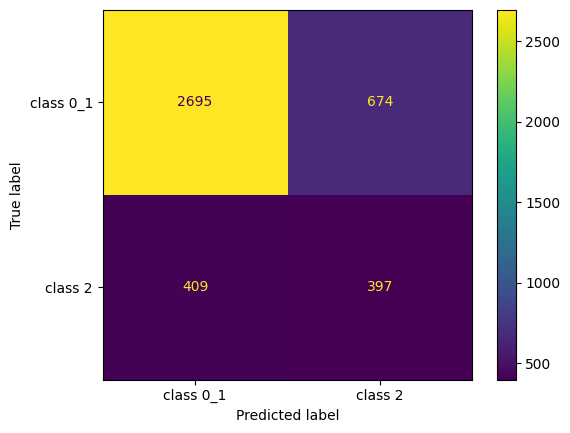



*********************************************
Train-set evaluate result:

842/842 [==============================] - 2s 2ms/step - loss: 0.1217 - accuracy: 0.9506
[0.1217246949672699, 0.9505568146705627]
842/842 [==============================] - 2s 2ms/step
Report for train set:

               precision    recall  f1-score   support

   class 0_1       0.98      0.92      0.95     13470
     class 2       0.93      0.98      0.95     13470

    accuracy                           0.95     26940
   macro avg       0.95      0.95      0.95     26940
weighted avg       0.95      0.95      0.95     26940



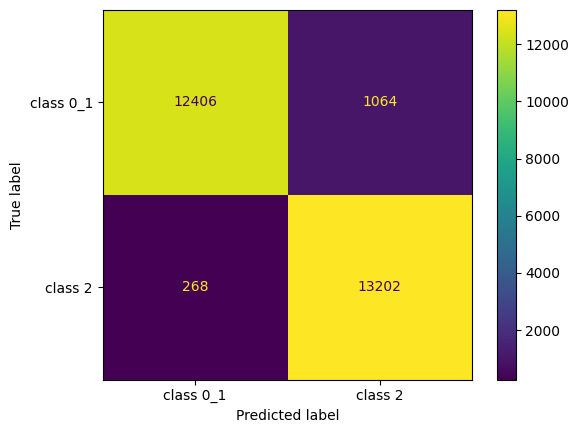

In [7]:
history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 600, epochs = 5000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0_1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int32)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int32)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

Streaming output truncated to the last 5000 lines.
34/36 [===========================>..] - ETA: 0s - loss: 0.1098 - accuracy: 0.9493
Epoch 3752: loss did not improve from 0.10360
36/36 [==============================] - 0s 14ms/step - loss: 0.1104 - accuracy: 0.9491 - val_loss: 0.1310 - val_accuracy: 0.9725
Epoch 3753/5000
35/36 [============================>.] - ETA: 0s - loss: 0.1118 - accuracy: 0.9477
Epoch 3753: loss did not improve from 0.10360
36/36 [==============================] - 0s 12ms/step - loss: 0.1121 - accuracy: 0.9475 - val_loss: 0.1346 - val_accuracy: 0.9694
Epoch 3754/5000
35/36 [============================>.] - ETA: 0s - loss: 0.1088 - accuracy: 0.9488
Epoch 3754: loss did not improve from 0.10360
36/36 [==============================] - 0s 13ms/step - loss: 0.1085 - accuracy: 0.9491 - val_loss: 0.1716 - val_accuracy: 0.9464
Epoch 3755/5000
33/36 [==========================>...] - ETA: 0s - loss: 0.1081 - accuracy: 0.9492
Epoch 3755: loss did not improve from 0.1

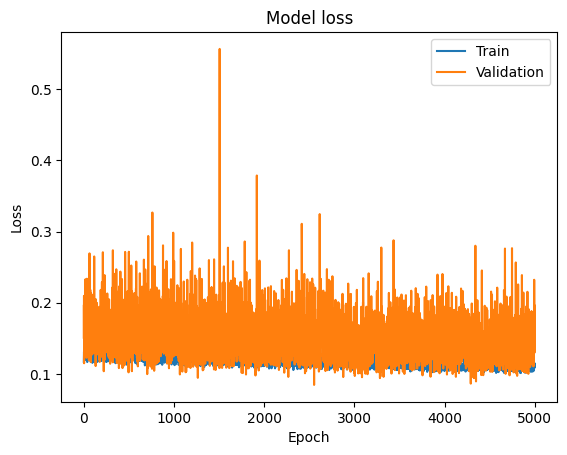



*********************************************




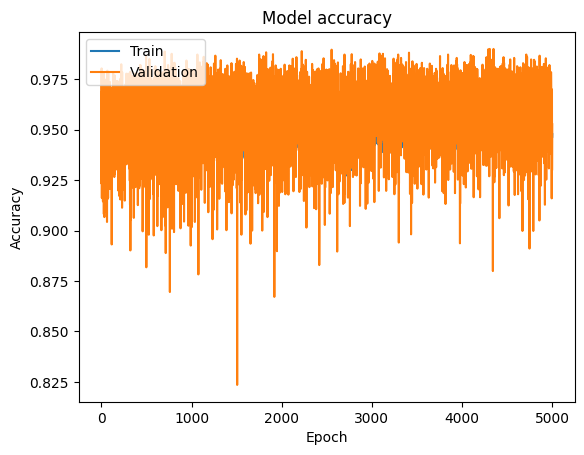



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 3ms/step - loss: 3.4159 - accuracy: 0.7578
[3.415919780731201, 0.7578443288803101]
131/131 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

   class 0_1       0.87      0.83      0.85      3369
     class 2       0.39      0.47      0.43       806

    accuracy                           0.76      4175
   macro avg       0.63      0.65      0.64      4175
weighted avg       0.77      0.76      0.77      4175



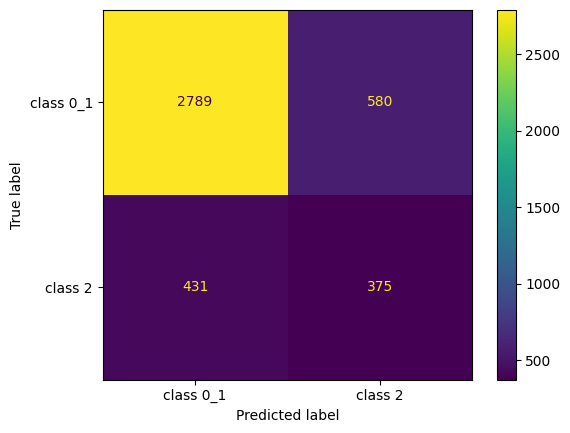



*********************************************
Train-set evaluate result:

842/842 [==============================] - 2s 2ms/step - loss: 0.1117 - accuracy: 0.9530
[0.11174020916223526, 0.9530066847801208]
842/842 [==============================] - 2s 2ms/step
Report for train set:

               precision    recall  f1-score   support

   class 0_1       0.96      0.94      0.95     13470
     class 2       0.94      0.96      0.95     13470

    accuracy                           0.95     26940
   macro avg       0.95      0.95      0.95     26940
weighted avg       0.95      0.95      0.95     26940



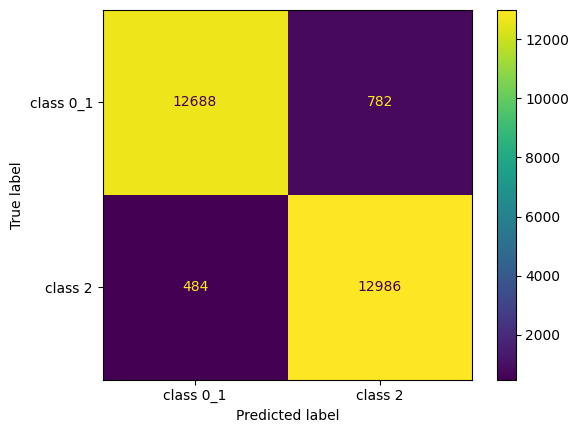

In [11]:
#***Model Continue Learning***#
#------------------------------#

model.load_weights(file_path)

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 600, epochs = 5000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0_1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int64)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int64)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

In [12]:
checkpoint.best

0.10133551806211472

Test-set evaluate result:

131/131 [==============================] - 0s 2ms/step - loss: 3.6182 - accuracy: 0.7648
[3.6182305812835693, 0.764790415763855]
131/131 [==============================] - 0s 1ms/step
Report for test set:

               precision    recall  f1-score   support

   class 0_1       0.86      0.84      0.85      3369
     class 2       0.40      0.45      0.42       806

    accuracy                           0.76      4175
   macro avg       0.63      0.64      0.64      4175
weighted avg       0.77      0.76      0.77      4175



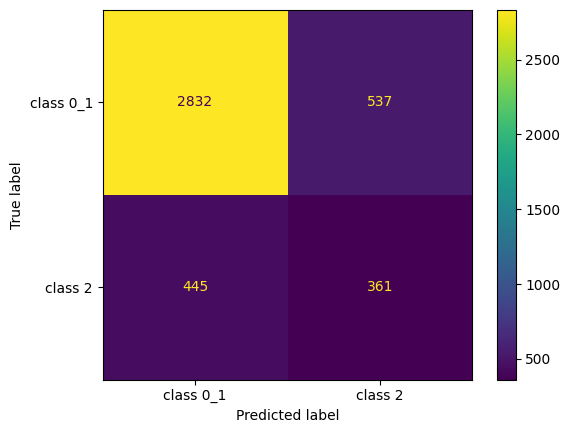



*********************************************
Train-set evaluate result:

842/842 [==============================] - 1s 2ms/step - loss: 0.1157 - accuracy: 0.9501
[0.11574887484312057, 0.9500742554664612]
842/842 [==============================] - 2s 2ms/step
Report for train set:

               precision    recall  f1-score   support

   class 0_1       0.95      0.95      0.95     13470
     class 2       0.95      0.95      0.95     13470

    accuracy                           0.95     26940
   macro avg       0.95      0.95      0.95     26940
weighted avg       0.95      0.95      0.95     26940



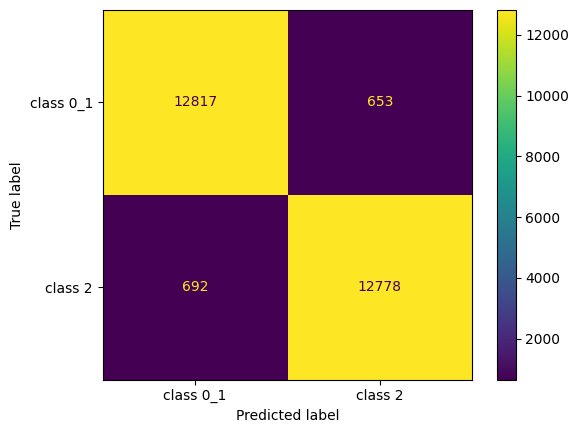

In [13]:
#***Best Model Test Only***#
#--------------------------#

model.load_weights(file_path)

############Pridecting results show######################

target_names = ['class 0_1', 'class 2']

print("Test-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int32)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int32)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

In [14]:
model.save("/content/drive/MyDrive/new_df/best_model_by_class2")